1. Crear el siguiente DataFrame indexado:
  calorías	tiempo
L	420	60
M	380	40
X	390	75
J	490	55
V	300	45


In [3]:
import pandas as pd

# Crear un diccionario con tus datos
datos = {
    'calorias': [420, 380, 390, 490, 300],
    'tiempo': [60, 40, 75, 55, 45]
}

# Crear un DataFrame de pandas usando el diccionario
df = pd.DataFrame(datos, index=['L', 'M', 'X', 'J', 'V'])

# Mostrar el DataFrame
print('DATAFRAME: Resultante con pandas usando el diccionario\n')
print(df)

DATAFRAME: Resultante con pandas usando el diccionario

   calorias  tiempo
L       420      60
M       380      40
X       390      75
J       490      55
V       300      45


2. Calcular la media, mediana, y desviación típica de ambas columnas.

In [4]:
# Calcular la media
media = df[['calorias', 'tiempo']].mean()

# Calcular la mediana
mediana = df[['calorias', 'tiempo']].median()

# Calcular la desviación estándar
desviacion = df[['calorias', 'tiempo']].std()

# Mostrar los resultados
print('La Media resultante es:\n', media)
print('\nLa Mediana resultante es:\n', mediana)
print('\nLa Desviación estándar resultante es:\n', desviacion)

La Media resultante es:
 calorias    396.0
tiempo       55.0
dtype: float64

La Mediana resultante es:
 calorias    390.0
tiempo       55.0
dtype: float64

La Desviación estándar resultante es:
 calorias    68.774995
tiempo      13.693064
dtype: float64


3. Añadir otra columna booleana al DataFrame para ver si se ha cumplido el reto de quemar más de 400 calorías por hora. La nueva columna debe  generarse  aplicando  una  fórmula  a  las  otras  columnas.  El DataFrame resultante debe ser el siguiente:

In [5]:
# Definir la función para calcular si se ha cumplido el reto
def reto_cumplido(row):
    calorias_por_hora = row['calorias'] / (row['tiempo'] / 60)
    return calorias_por_hora > 400

# Aplicar la función a cada fila y asignar los resultados a una nueva columna
df['reto_cumplido'] = df.apply(reto_cumplido, axis=1)

# Mostrar el DataFrame
print('El nuevo DataFrame con la columna reto_cumplido es:\n')
print(df)

El nuevo DataFrame con la columna reto_cumplido es:

   calorias  tiempo  reto_cumplido
L       420      60           True
M       380      40           True
X       390      75          False
J       490      55           True
V       300      45          False


In [7]:
# Cambiar los índices a números empezando desde 1
df.index = range(1, len(df) + 1)

# Filtrar y mostrar solo las filas con índices pares
df_indices_pares = df.iloc[1::2]

# Filtrar y mostrar solo las filas donde las calorías son mayores a 400
df_calorias_mayores_400 = df_indices_pares.loc[df_indices_pares['calorias'] > 400]

# Mostrar el DataFrame filtrado
print('El DataFrame filtrado con filas pares que tienen calorías mayores a 400 es:\n')
print(df_calorias_mayores_400)


El DataFrame filtrado con filas pares que tienen calorías mayores a 400 es:

   calorias  tiempo  reto_cumplido
4       490      55           True


In [8]:
# Crear la Serie con los porcentajes
porcentajes = df['reto_cumplido'].value_counts(normalize=True) * 100

# Mostrar la Serie
print(porcentajes)

reto_cumplido
True     60.0
False    40.0
Name: proportion, dtype: float64


In [9]:
# Calcular los porcentajes
porcentaje_cumplido = df['reto_cumplido'].mean() * 100
porcentaje_no_cumplido = 100 - porcentaje_cumplido

# Crear la Serie con los porcentajes
porcentajes = pd.Series([porcentaje_cumplido, porcentaje_no_cumplido], index=['Cumplido', 'No cumplido'])

# Mostrar la Serie
print ('La Serie con los porcentajes es:\n')
print(porcentajes)

La Serie con los porcentajes es:

Cumplido       60.0
No cumplido    40.0
dtype: float64


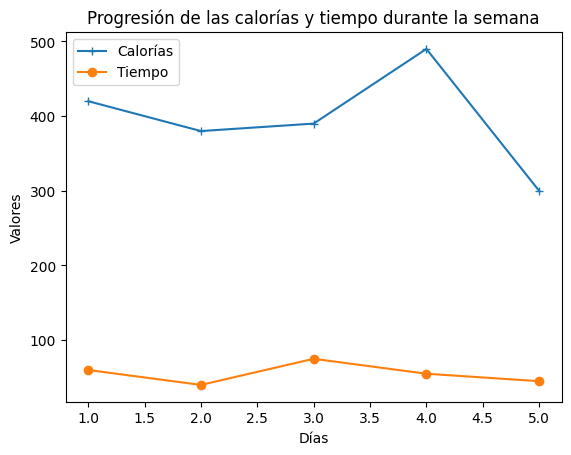

In [10]:
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subtramas
fig, ax = plt.subplots()

# Dibujar las líneas para las calorías y el tiempo con los marcadores correspondientes
ax.plot(df.index, df['calorias'], label='Calorías', marker='+')
ax.plot(df.index, df['tiempo'], label='Tiempo', marker='o')

# Configurar las etiquetas de los ejes y el título del gráfico
ax.set_xlabel('Días')
ax.set_ylabel('Valores')
ax.set_title('Progresión de las calorías y tiempo durante la semana')
ax.legend()

# Mostrar el gráfico
plt.show()